<img src="https://github.com/KDewangan/InsaidData/blob/master/Assests/IPL_logo.jpg?raw=true" width="340" height="360" />

# Exploratory Data Analysis 

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Impact of toss on winning the match?](#section401)<br/>
    - 4.2 [Overall win % of team who bat first?](#section402)<br/>
    - 4.3 [Home adavantages to the team?](#section403)<br/>
    - 4.4 [Success comparison of ILP teams.](#section404)<br/>          
    - 4.5 [Top IPL  players-of- the-match winners.](#section405)<br/>
    - 4.6 [Top wicket taker bawlers.](#section406)<br/>
    - 4.7 [Top run scorer batsmans in IPL.](#section407)<br/>
    - 4.8 [Best all-rounder in IPL players](#section408)<br/>
    - 4.10 [Highest boundary hit by players.](#section4010)<br/>
    - 4.11 [ Highest scored match in IPL.](#section4011)<br/>
    - 4.12 [How many % matches has been high scorring?](#section4012)<br/>
    - 4.13 [Which Team had won by maximum wickets?](#section4013)<br/>
    - 4.14 [Which Team had won by maximum runs?](#section4014)<br/>
    - 4.15 [Which Team had won by (closest margin) minimum runs?](#section4015)<br/>
    - 4.16 [How many players have been playing the IPL League ?](#section4016)<br/>
    - 4.17 [Top 10 players Hunred, Fifty, Thirty.](#section4017)<br/>
    
5. [Conclusions](#section5)<br/>  
   

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


### 2. Data Loading and Description

- __Matches__ dataset consists information of all the fixture  of all seasions of IPL. These dataset comprises of __696 observations of 18 columns__.  
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.


- __Deliveries__ dataset consists information of every ball of each matches in IPL history. These dataset comprises of __164750 observations of 21 columns__.  


                                         **Matches**

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| season   | Year on which tornament played                                       | 
| city      | Venue of match                         |  
| toss_winner        | The team who won the toss                                         | 
| winner          | Team who won the match                                       |   
| win_by_runs           | The run difference b/w loosing team and the  target           |
| win_by_wickets           | Number of wickets without using caching team achived the target                                          |
|player_of_match|   The player who performance helped to win the match


                                        **Deliveries**

| Column Name   | Description                        |
| ------------- |:-------------                                            :| 
| match_id   | Fixture uinque identity                                      | 
| inning      | A cricket match  has 2 inning                         |  
| batting_team        | Team who does the bat                                         | 
| bowling_team          | Team who does bowling                                         |   
| over           | T20 Cricket match is 20-20 for each sides. this column defines the current runnig over                                         |
| ball           | Boll of the running over.                                         |
| batsman         | The batsman who face the ball |
| bowler         | The bowler who throws the ball of over|
| batsman_runs        | Runs which earned by batsman againts bowler by his shots
| extra_runs          | Exept batsman runs like: bye_runs,  legbye_runs, noball_runs, penalty_runs                                    |
| total_runs         | sum of all run like:Batsman,Extra runs                                             |
|player_dismissed |                            Name of the player who got out|
|dismissal_kind|             Type of dismissal on which batsman got out|





#### Importing packages                                          

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output




#### Importing the Dataset

In [0]:
matches_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")
deleveries_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv")

# matches_data=pd.read_csv("matches.csv")
# deleveries_data=pd.read_csv("deliveries.csv")




## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
print(matches_data.shape)                                                  # This will print the number of rows and comlumns of the Data Frame
print(deleveries_data.shape) 


(696, 18)
(164750, 21)


matches dataset has __696 rows__ and __18 columns.__ 

Delieveries dataset has __164750 rows__  and __21 columns.__

In [4]:
print(matches_data.columns)                                          # This will print the names of all columns.
print(deleveries_data.columns)  

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [5]:
matches_data.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deleveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
print(matches_data.info())                                             # This will give Index, Datatype and Memory information
print(deleveries_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-

In [8]:
deleveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [9]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

#### Obervation :

matches data looks like good, lots of umpire3  columns values are missing but that is not much usefull column so we can drop that.
few value of __city__ column is null that we can replace with either team1 or team2 home location.
few of __winner__ and __player_of_match__ columns values are missing but that becuase of no result or match abandoned.

In [10]:
deleveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
fielder             158832
dtype: int64

#### Obervation :

deliveries data looks like good, so much __player_dismissed, dismissal_kind, fielder__ values are missing but not need to treat the null value, this is because of player doesn't get out on every ball, and the columns are nullable.

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [0]:
profile_matches = pandas_profiling.ProfileReport(matches_data)
profile_matches.to_file(outputfile="matches_before_preprocessing.html")

from google.colab import files
files.download("matches_before_preprocessing.html")


In [0]:
profile_delivies = pandas_profiling.ProfileReport(deleveries_data)
profile_delivies.to_file(outputfile="deleveries_before_preprocessing.html")

from google.colab import files
files.download("deleveries_before_preprocessing.html")


### 3.3 Preprocessing

- Dealing with missing values __matches dataset__<br/>
 
    - city missing values can be replaced by one of location from both the team location which occurance is higher. 
    - Droping the column umpire1, umpire2,umpire3 because its much useable to make decisions.



- Dealing with duplicate rows __deliveries dataset__<br/>
 
    - Dataset has 5 duplicate rows, so droping them.
  

 







In [0]:
matches_data['city']=matches_data.apply(lambda x: 'Mumbai' if pd.isna(x['city']) else x['city'],axis=1)  


In [14]:
matches_data.drop(['umpire1', 'umpire2','umpire3'], axis=1,inplace=True)
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [15]:
print(len(deleveries_data))
deleveries_data.drop_duplicates(subset=None, keep='first', inplace=True)
print(len(deleveries_data))


164750
164745


__Droping__ rows which has NaN values in winner columns

In [16]:
matches_data.drop(matches_data[matches_data['winner'].isnull()].index,inplace=True)
matches_data.shape

(693, 15)

## 3.4 Post Pandas Profiling

In [0]:
profile_matches = pandas_profiling.ProfileReport(matches_data)
profile_matches.to_file(outputfile="matches_after_preprocessing.html")

from google.colab import files
files.download("matches_after_preprocessing.html")

In [0]:
profile_delivies = pandas_profiling.ProfileReport(deleveries_data)
profile_delivies.to_file(outputfile="deleveries_after_preprocessing.html")

from google.colab import files
files.download("deleveries_after_preprocessing.html")

Now we have preprocessed the data, that is cleaned and meaningfull.


### 4. Questions

### 4.1 Impact of toss on winning the match?

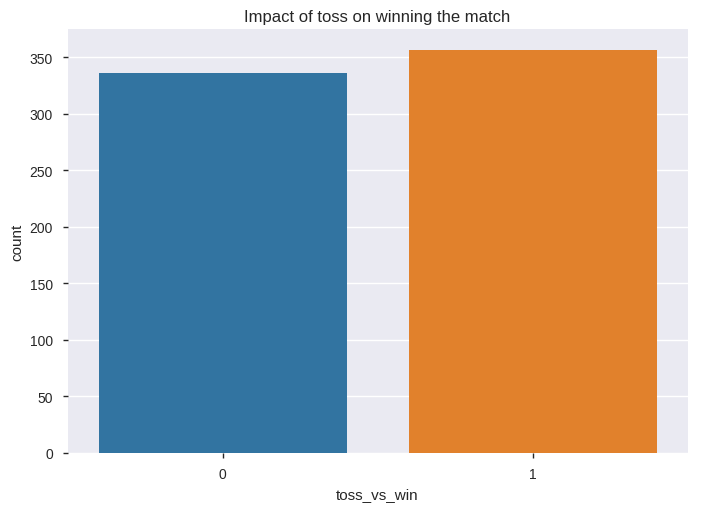

In [19]:
from pylab import rcParams
matches_data_by_toss=matches_data
matches_data_by_toss['toss_vs_win']=matches_data.apply(lambda x: 1 if x["toss_winner"]==x["winner"] else 0,axis=1)

sns.countplot(x='toss_vs_win',data=matches_data_by_toss).set_title('Impact of toss on winning the match')

plt.show()


**For every Indiviual team**.

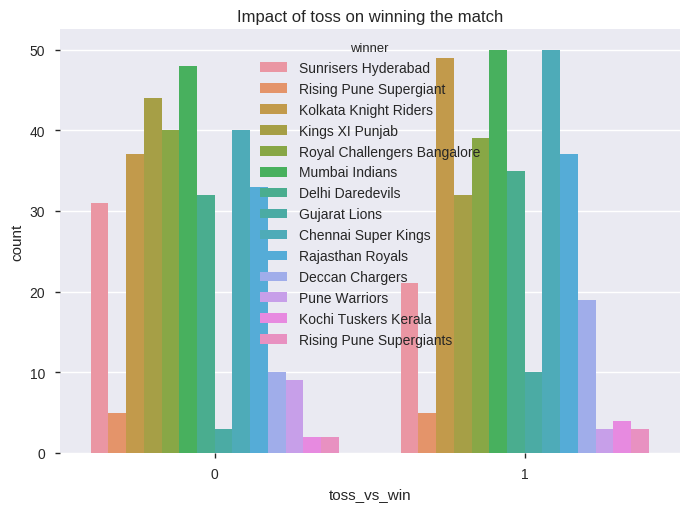

In [20]:
sns.countplot(x='toss_vs_win',hue="winner",data=matches_data_by_toss).set_title('Impact of toss on winning the match')

# plt.rcParams['figure.figsize'] = (20,10)
# plt.rcParams["xtick.labelsize"] = 10

plt.show()

### 4.2 Overall win % of team who bat first?

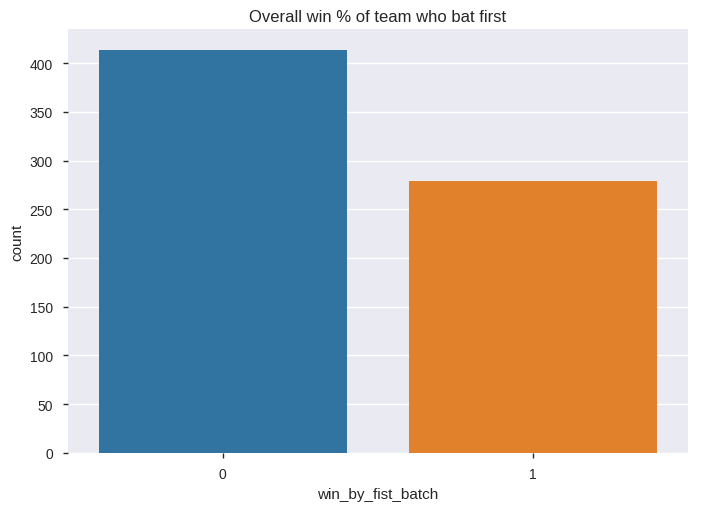

In [21]:
win_by_bat_first=matches_data
win_by_bat_first['win_by_fist_batch']=matches_data.apply(lambda x: 1 if ((x["toss_decision"]=='bat') & ((x["win_by_runs"]|x["win_by_wickets"])!=0)) else 0,axis=1)

sns.countplot(x='win_by_fist_batch',data=win_by_bat_first).set_title('Overall win % of team who bat first')

# plt.rcParams['figure.figsize'] = (10,7)
# plt.rcParams["xtick.labelsize"] = 10
plt.show()

In [0]:
print(str.format('Win % if bat first:{}',round(len(win_by_bat_first[win_by_bat_first.win_by_fist_batch == 1])/len(win_by_bat_first['win_by_fist_batch']),2)))

Win % if bat first:0.4


### 4.3 Home adavantages to the team?

In [0]:
##### Home adavantages to the team?

  

- Using crosstab function

### 4.4 Success comparison of ILP teams.

- Using countplot 

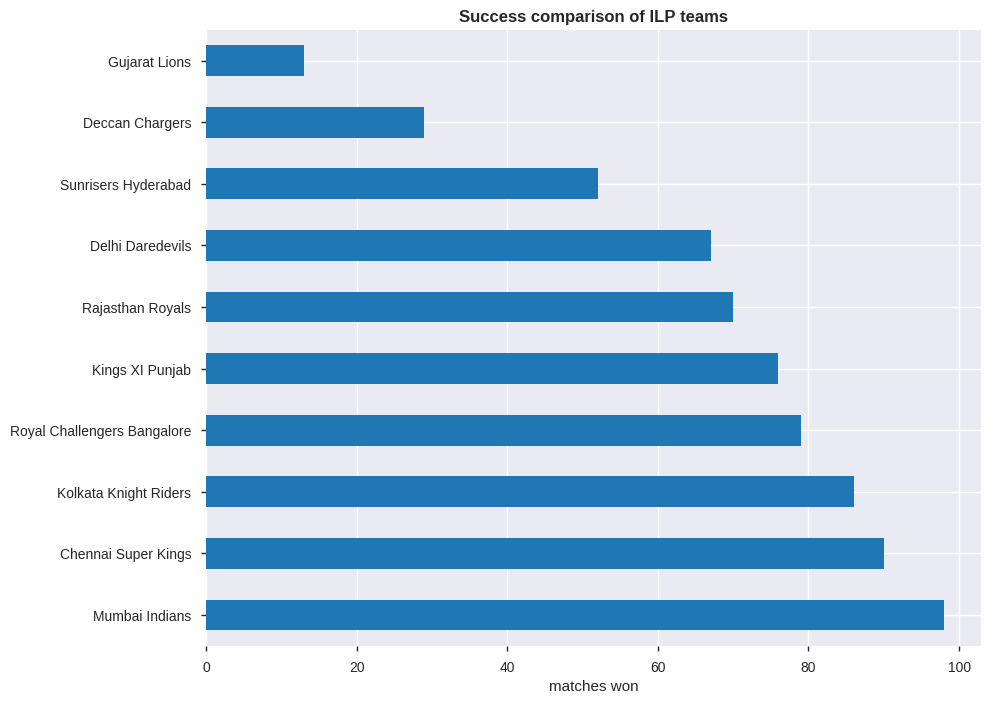

In [22]:
#### most succesfful ILP team
matches_data['winner'].value_counts().head(10).plot.barh(figsize=(10,8)).set_title('Success comparison of ILP teams',weight='bold')
plt.xlabel("matches won")
plt.show()

__Matches win % destribution among all teams__

Text(0.5, 1.0, 'Matches win % destribution among all teams')

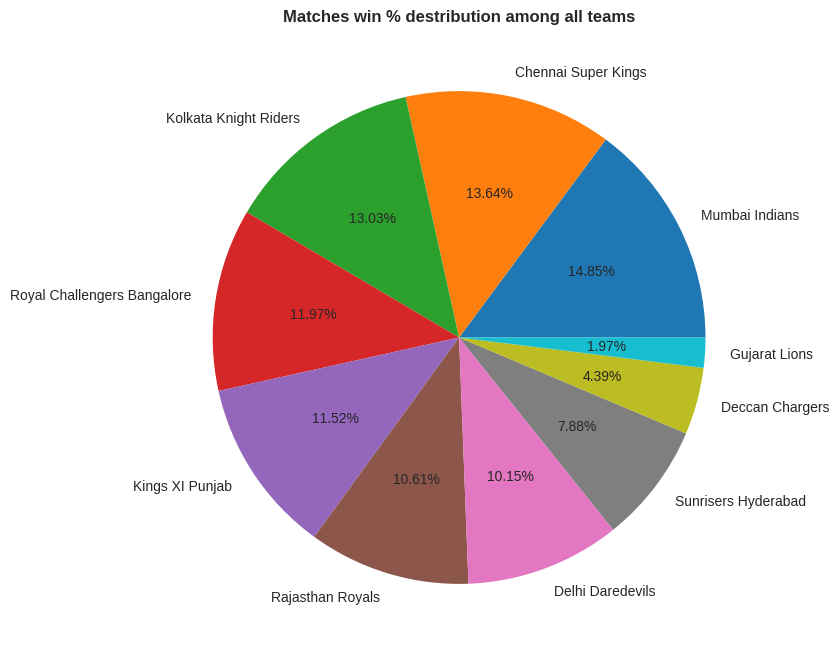

In [23]:
matches_data['winner'].value_counts().head(10).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Matches win % destribution among all teams', weight='bold')

__Season wise distribution of matches won for all team__

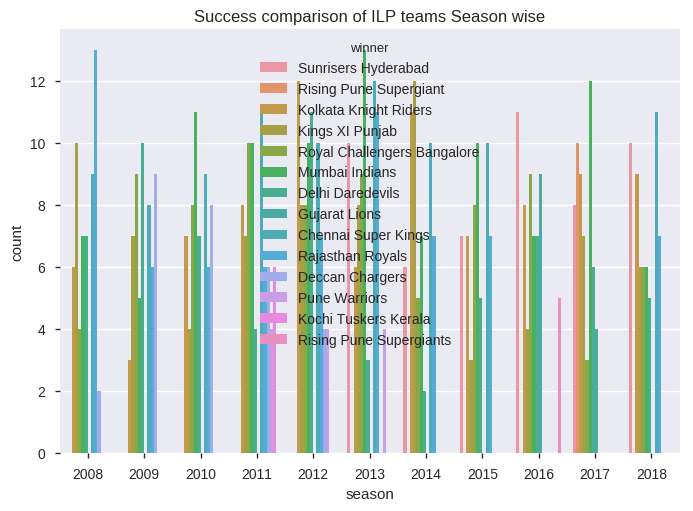

In [29]:
sns.countplot(x='season',hue="winner",data=matches_data).set_title('Success comparison of ILP teams Season wise')
sns.color_palette("muted")
plt.show()


### 4.5  Top IPL  players-of- the-match winners.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

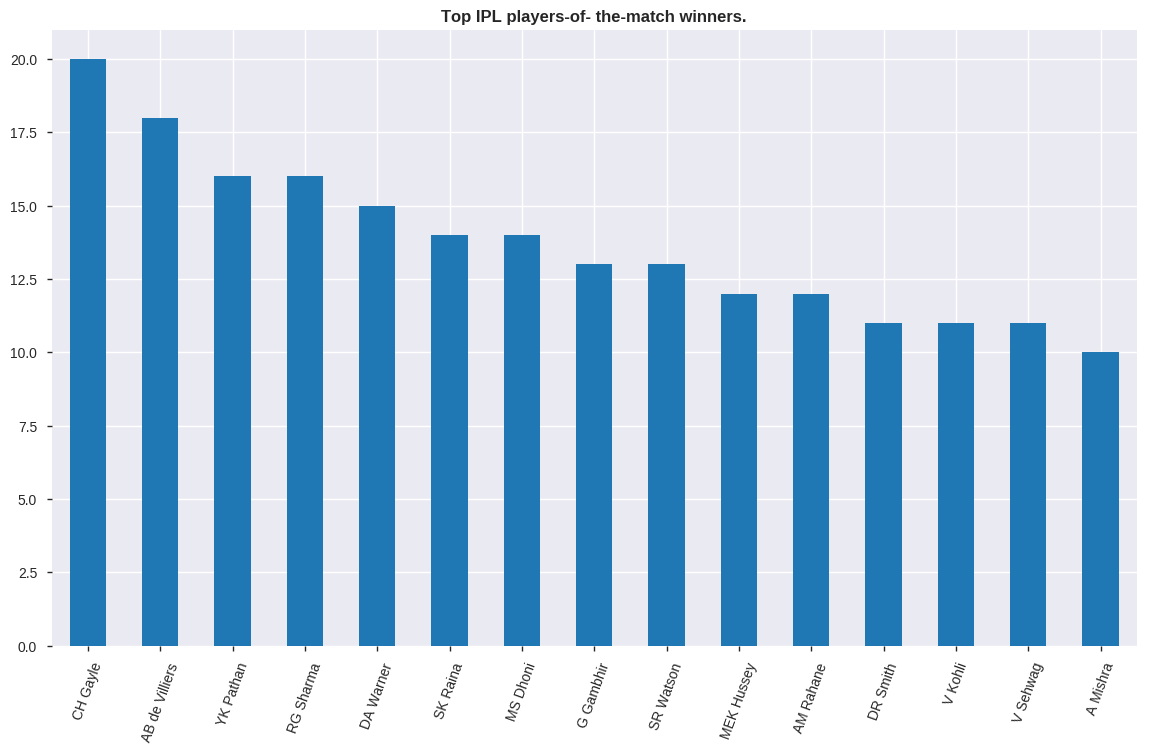

In [30]:
#### Top IPL  players-of- the-match winners.
matches_data['player_of_match'].value_counts().head(15).plot.bar(figsize=(14,8)).set_title('Top IPL players-of- the-match winners.',weight='bold')
plt.xticks(rotation=70)

### 4.6 Top wicket taker bawlers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

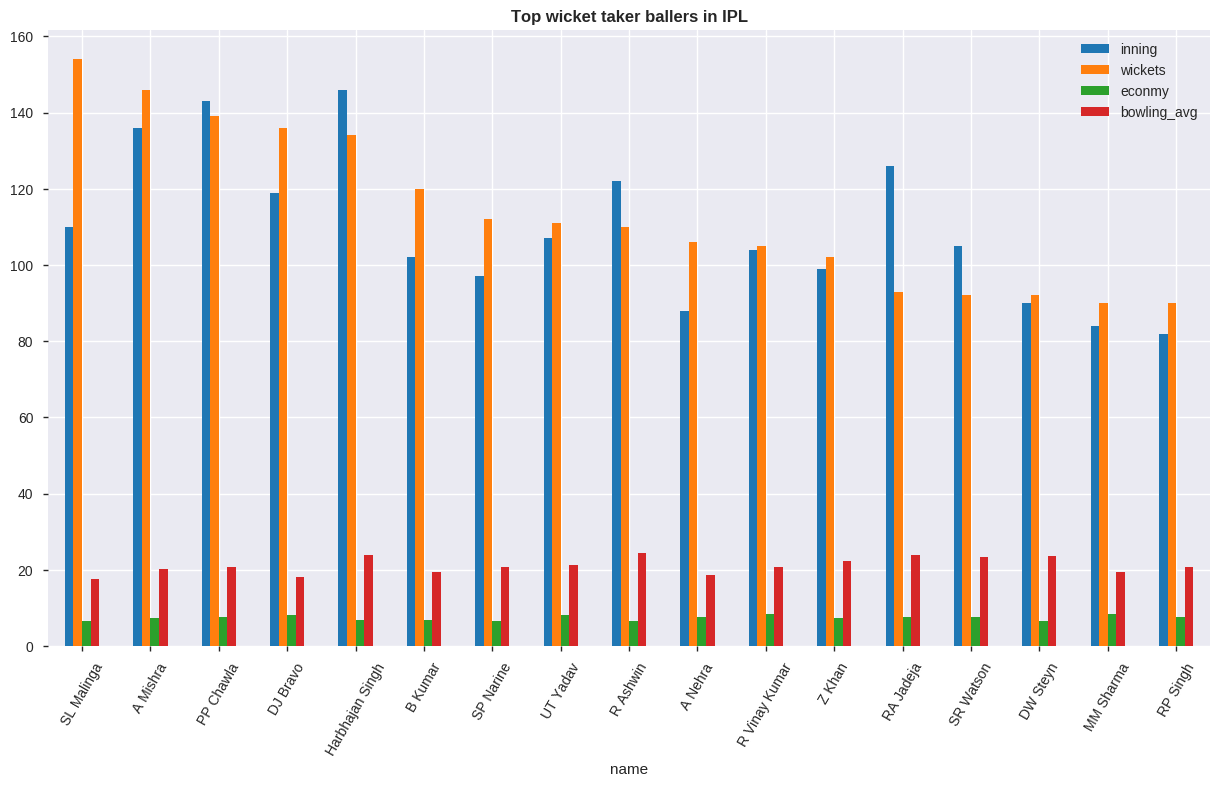

In [31]:
##### most wicket taker baller #####
grpby_bowler=deleveries_data.groupby('bowler')

def BowlerEconomy(key):
    bowler=grpby_bowler.get_group(key)
    total_innnig=len(bowler['match_id'].unique())
    total_run_given= bowler['batsman_runs'].sum()
    total_bolls=len(bowler)
    total_over=(len(bowler)-(len(bowler[(bowler['wide_runs']!=0) | (bowler['noball_runs']!=0)])))/6
    bowler_econmy=total_run_given/total_over
    return total_innnig,total_bolls,round(bowler_econmy,2)

bowler_lst=[]
grp_bowler_wickets=deleveries_data[deleveries_data['player_dismissed'].notnull() & deleveries_data['dismissal_kind'].isin(['caught','bowled','lbw','caught and bowled','stumped','hit wicket'])].groupby('bowler')
for name,items in grp_bowler_wickets:
    wickets=len(items)
    inning,total_bolls,econmy=BowlerEconomy(name)              ##total_runs / total_over
    avg= round(total_bolls/ wickets,2)                        ##total_ball / total_wicket
    bowler_lst.append([name,inning,wickets,econmy,avg])

bowler=pd.DataFrame(data=bowler_lst,columns=['name','inning','wickets','econmy','bowling_avg'])

bowler.sort_values(['wickets','econmy','bowling_avg'],axis=0, ascending=False).head(17).plot.bar(x='name',y=['inning','wickets','econmy','bowling_avg'],figsize=(15,8)).set_title('Top wicket taker ballers in IPL',weight='bold')
plt.xticks(rotation=60)



In [32]:
bowler.sort_values(['wickets','econmy','bowling_avg'],axis=0, ascending=False).reset_index().head(15)

,index,name,inning,wickets,econmy,bowling_avg
0,272,SL Malinga,110,154,6.49,17.49
1,5,A Mishra,136,146,7.25,20.06
2,215,PP Chawla,143,139,7.59,20.79
3,80,DJ Bravo,119,136,8.20,18.00
4,106,Harbhajan Singh,146,134,6.88,23.75
5,44,B Kumar,102,120,6.91,19.50
6,278,SP Narine,97,112,6.46,20.78
7,308,UT Yadav,107,111,8.07,21.30
8,220,R Ashwin,122,110,6.52,24.30
9,7,A Nehra,88,106,7.62,18.62


### 4.7 Top run scorer batsmans in IPL.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

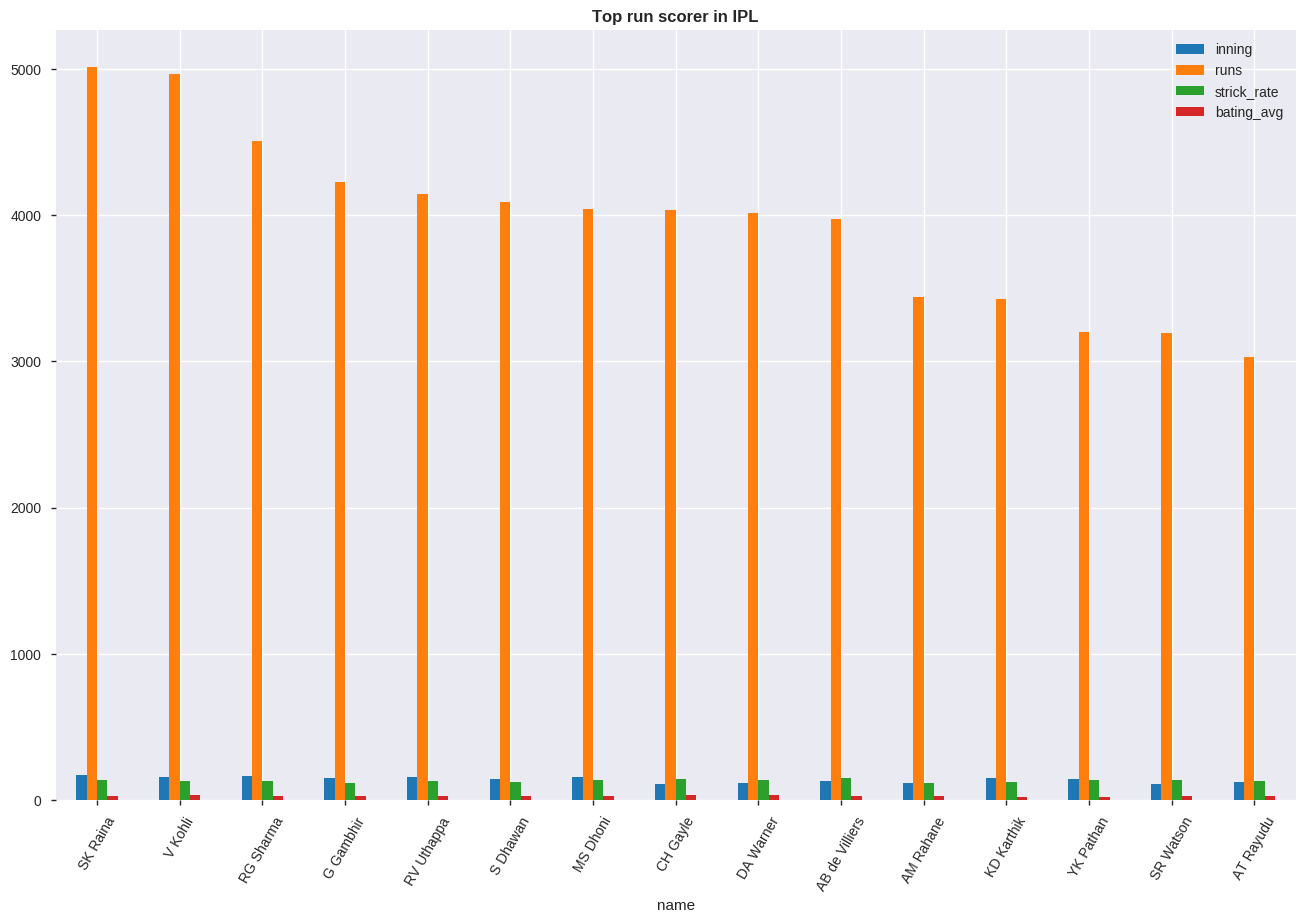

In [33]:
#### most run getter #######
grp_data=deleveries_data.groupby(["batsman"])
list1=[]
for name,items in grp_data:
    innig=len(items['match_id'].unique())
    runs=items['batsman_runs'].sum()
    runs_by_boundary=round(items[(items['batsman_runs']==6)|(items['batsman_runs']==4)]['batsman_runs'].sum()/runs,2)
    avg=round((items['batsman_runs'].sum()/len(items['match_id'].unique())),0)
    strick_rat=round((items['batsman_runs'].sum()/len(items)*100),0)
    thirty=0
    fifty=0
    hundred=0
    grp_by_match=items.groupby('match_id')['batsman_runs'].sum()
    for i in grp_by_match.index:
        if (grp_by_match[i]>=30) & (grp_by_match[i]<50):
            thirty+=1
        elif (grp_by_match[i]>=50) & (grp_by_match[i]<100):
            fifty+=1
        elif (grp_by_match[i]>=100):    
            hundred+=1       
    list1.append([name,innig,runs,avg,strick_rat,thirty,fifty,hundred,runs_by_boundary])   
    
batsman=pd.DataFrame(data=list1,columns=['name','inning','runs','bating_avg','strick_rate','thirty','fifty','hundred','runs_by_boundary'])

batsman.sort_values(['runs','strick_rate','bating_avg'],axis=0, ascending=False).head(15).plot.bar(x='name',y=['inning','runs','strick_rate','bating_avg'],figsize=(16,10)).set_title('Top run scorer in IPL',weight='bold')
plt.xticks(rotation=60)

In [34]:
batsman.loc[:,['name','inning','runs','strick_rate','bating_avg']].sort_values(['runs','strick_rate','bating_avg'],axis=0, ascending=False).head(15)

,name,inning,runs,strick_rate,bating_avg
400,SK Raina,172,5014,135.0,29.0
458,V Kohli,155,4962,128.0,32.0
347,RG Sharma,167,4504,129.0,27.0
143,G Gambhir,151,4223,120.0,28.0
364,RV Uthappa,159,4144,128.0,26.0
371,S Dhawan,142,4090,121.0,29.0
276,MS Dhoni,158,4041,135.0,26.0
88,CH Gayle,111,4037,145.0,36.0
108,DA Warner,114,4014,138.0,35.0
24,AB de Villiers,129,3974,148.0,31.0


__Top 15 players who make thier max of runs from boundaries__

In [35]:
batsman.loc[:,['name','inning','runs','strick_rate','runs_by_boundary']].sort_values(['runs','runs_by_boundary'],axis=0, ascending=False).head(15)

,name,inning,runs,strick_rate,runs_by_boundary
400,SK Raina,172,5014,135.0,0.58
458,V Kohli,155,4962,128.0,0.57
347,RG Sharma,167,4504,129.0,0.58
143,G Gambhir,151,4223,120.0,0.55
364,RV Uthappa,159,4144,128.0,0.61
371,S Dhawan,142,4090,121.0,0.58
276,MS Dhoni,158,4041,135.0,0.55
88,CH Gayle,111,4037,145.0,0.76
108,DA Warner,114,4014,138.0,0.64
24,AB de Villiers,129,3974,148.0,0.61


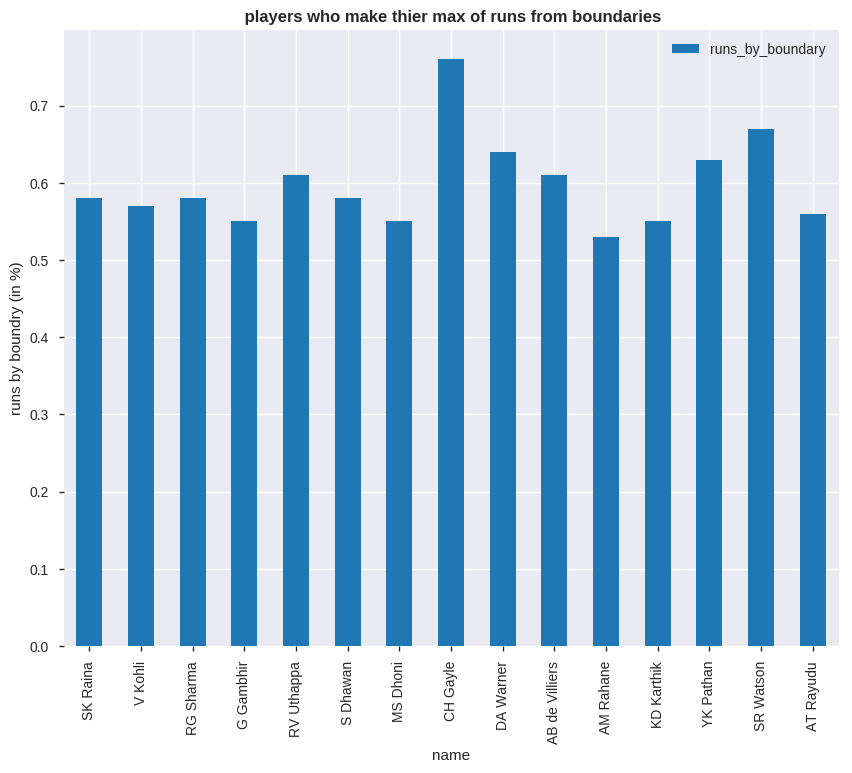

In [36]:
batsman.sort_values(['runs','runs_by_boundary'],axis=0, ascending=False).head(15).plot.bar(x='name',y='runs_by_boundary',figsize=(10,8)).set_title(' players who make thier max of runs from boundaries',weight='bold')
plt.ylabel("runs by boundry (in %)")
plt.show()

### 4.8 Best all-rounder players in IPL 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

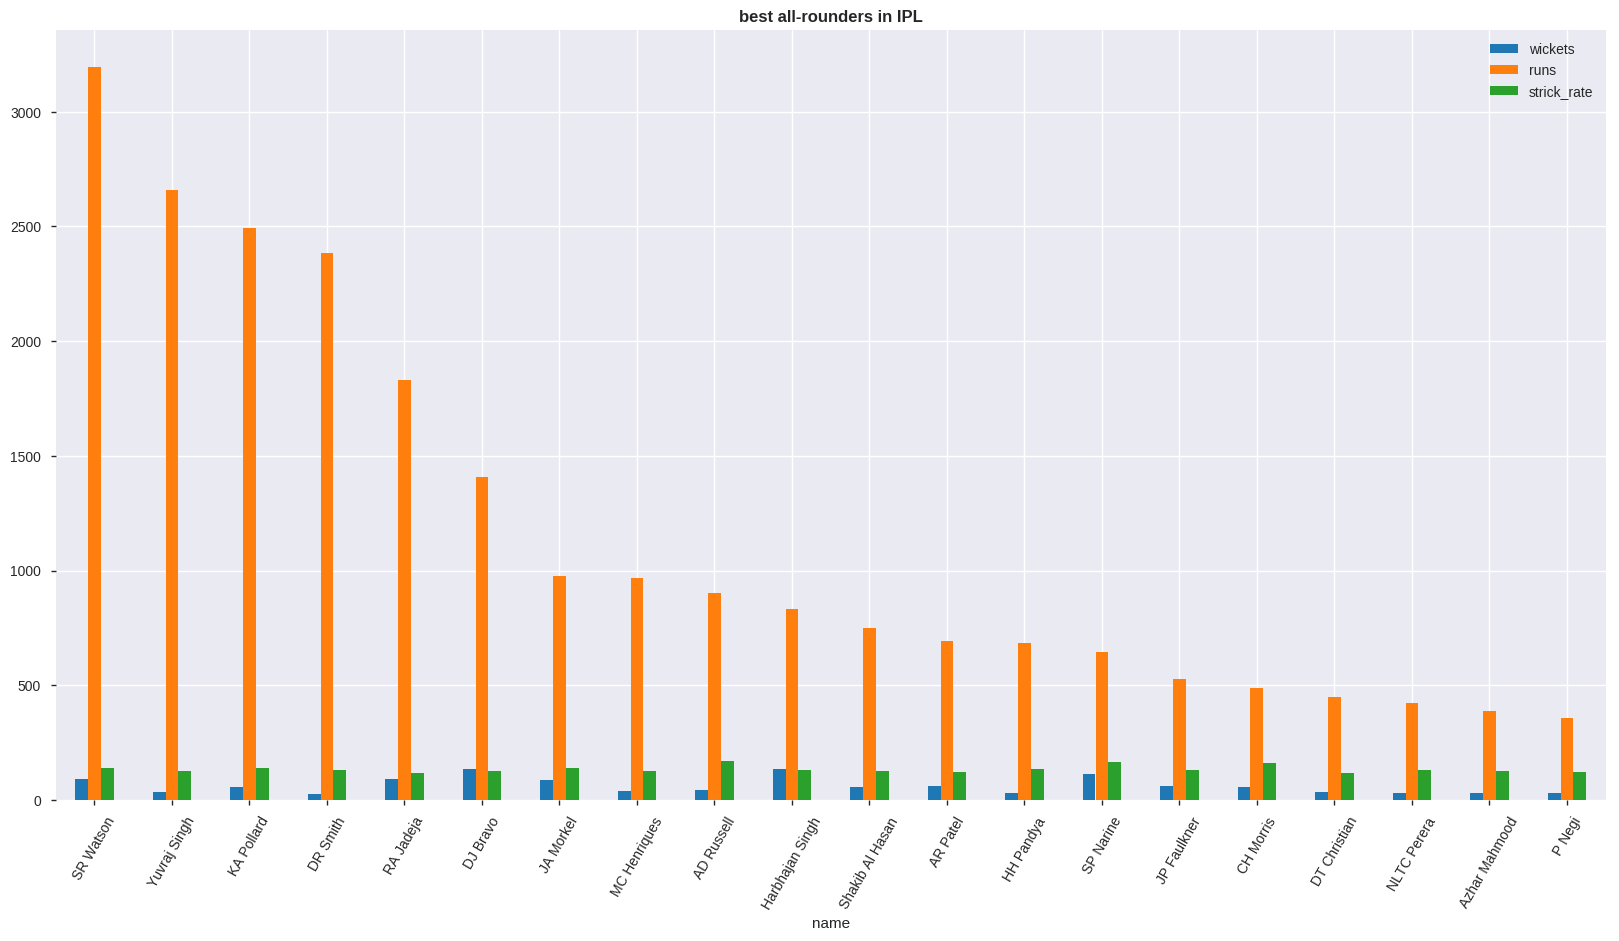

In [37]:

AllRounder=pd.merge(left=batsman, right=bowler, on='name')
AllRounder.drop(['inning_x','inning_y'],axis=1,inplace=True)

bestAllRounder=AllRounder[(AllRounder['bating_avg']>=10) &(AllRounder['strick_rate']>=100) & (AllRounder['bowling_avg']<=25) & (AllRounder['wickets']>=25)].sort_values(['runs','wickets'])  

bestAllRounder.sort_values(['bowling_avg'],ascending=True).sort_values(['runs','strick_rate'],ascending=False).head(20).plot.bar(x='name',y=['wickets','runs','strick_rate'],figsize=(20,10)).set_title('best all-rounders in IPL',weight='bold')
plt.xticks(rotation=60)

In [38]:
bestAllRounder.loc[:,['name','runs','bating_avg','strick_rate','wickets','econmy','bowling_avg']].sort_values(['bowling_avg'],ascending=True).sort_values(['runs','strick_rate'],ascending=False).head(15)

,name,runs,bating_avg,strick_rate,wickets,econmy,bowling_avg
258,SR Watson,3197,28.0,138.0,92,7.63,23.23
300,Yuvraj Singh,2657,22.0,125.0,36,7.35,24.50
131,KA Pollard,2492,21.0,140.0,56,8.45,22.79
84,DR Smith,2385,27.0,132.0,26,8.76,21.42
212,RA Jadeja,1832,16.0,119.0,93,7.65,23.78
73,DJ Bravo,1408,15.0,125.0,136,8.20,18.00
112,JA Morkel,975,15.0,137.0,85,7.86,21.26
163,MC Henriques,969,19.0,126.0,38,8.17,24.16
22,AD Russell,900,23.0,170.0,44,8.60,20.23
97,Harbhajan Singh,833,10.0,132.0,134,6.88,23.75


### 4.9 Top aggressive playing style  players

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

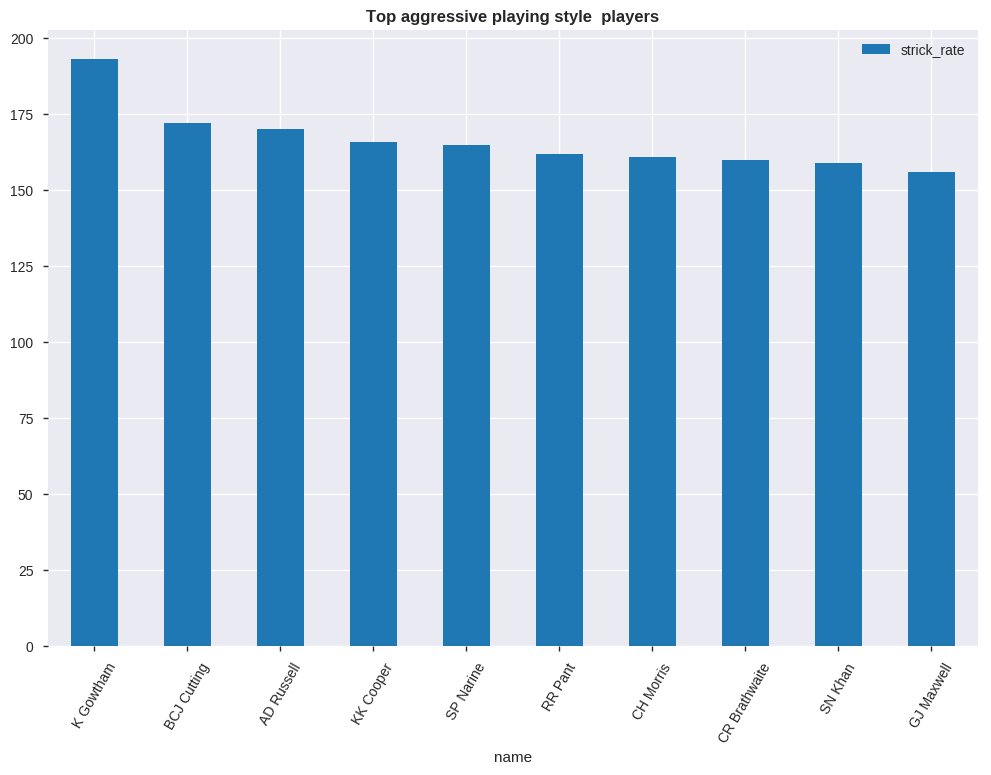

In [39]:
batsman[batsman['inning']>10].sort_values(['strick_rate'], ascending=False).head(10).sort_values(['strick_rate'],axis=0, ascending=False).head(15).plot.bar(x='name',y=['strick_rate'],figsize=(12,8)).set_title('Top aggressive playing style  players',weight='bold')
plt.xticks(rotation=60)



### 4.10 Highest boundary hit by players.

Text(0.5, 0, 'number of boundaries')

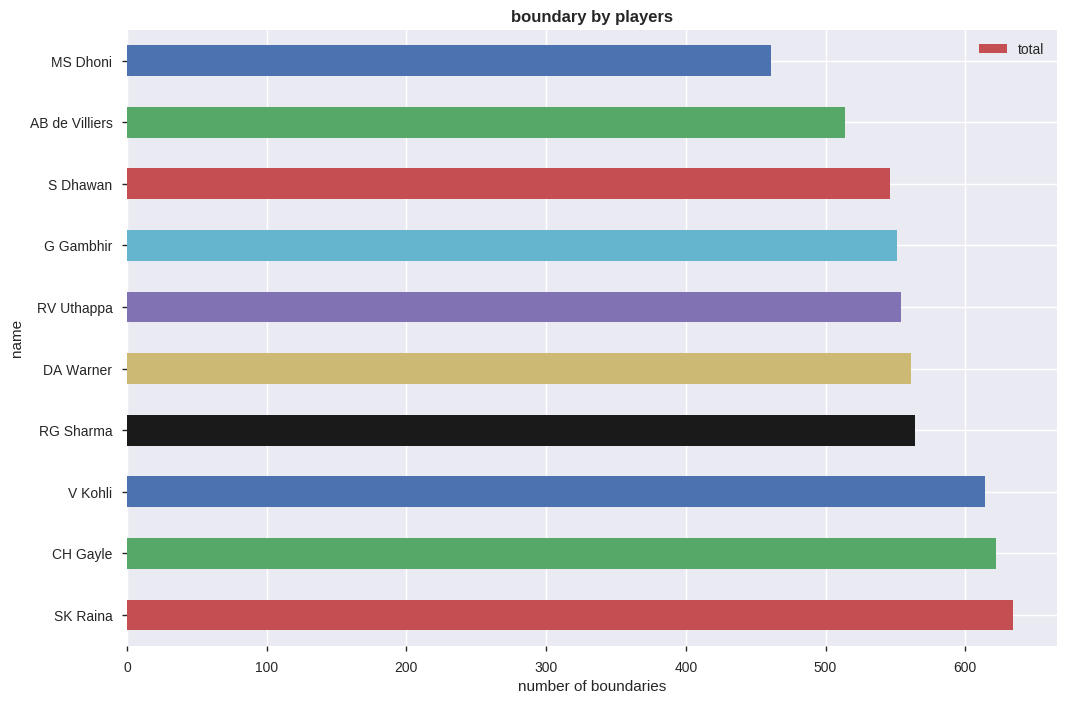

In [40]:
# deleveries_data.loc[:,'bye_runs':'total_runs'].head(20) 
# deleveries_data.columns
boundary_count=[]

boundary_deliveries=deleveries_data.loc[(deleveries_data['batsman_runs']==6)|(deleveries_data['batsman_runs']==4),['match_id','batsman','bowler','batsman_runs']]
for name,items in  boundary_deliveries.groupby('batsman'):
#     print(str.format('{}:{}',name,len(items[items['batsman_runs']==4])))
    four=len(items[items['batsman_runs']==4])
    six=len(items[items['batsman_runs']==6])
    total=four+six
    boundary_count.append([name,four,six,total])
    
df_batsmans_boundary=pd.DataFrame(data=boundary_count,columns=['name','four','six','total'])  
df_batsmans_boundary.sort_values(['total'],axis=0, ascending=False).head(10).plot.barh(x='name',y='total',figsize=(12,8),color=['r', 'g', 'b', 'k', 'y', 'm', 'c']).set_title('boundary by players',weight='bold')
plt.xlabel('number of boundaries')



### 4.11 __Highest scored match in IPL__

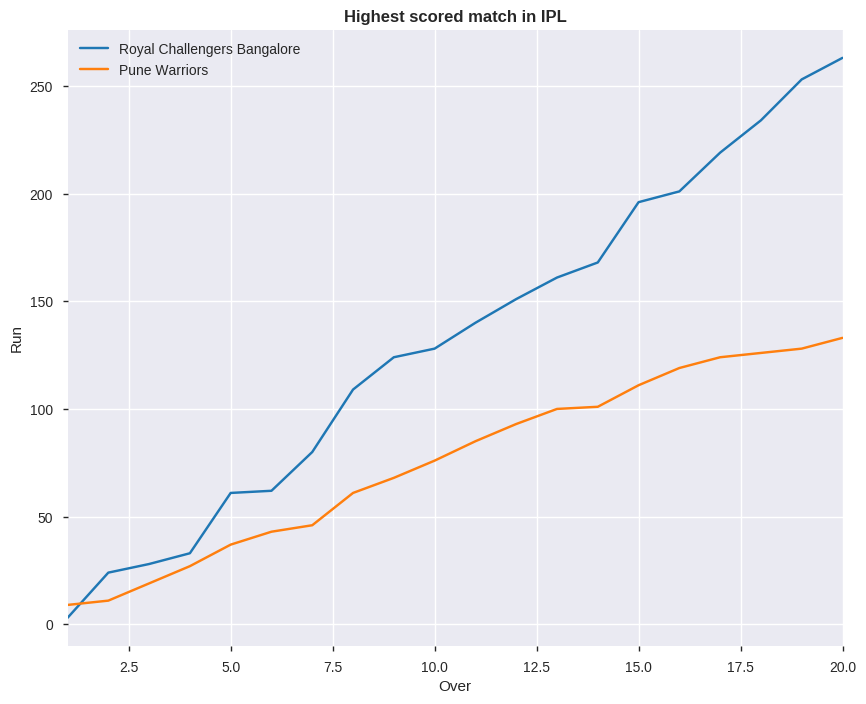

In [41]:
gpr_by_innig=deleveries_data.groupby(['match_id','inning'])['total_runs'].sum()

# gpr_by_innig[gpr_by_innig.values==gpr_by_innig.max()]
# gpr_by_innig[gpr_by_innig.values==gpr_by_innig.min()]
# deleveries_data[deleveries_data['match_id']==411]
# deleveries_data[deleveries_data['match_id']==411]
RCB=[]
pune_warriors=[]
for key,values in deleveries_data[deleveries_data['match_id']==411].groupby(['inning']):
    cumsum_by_over= values.groupby(['over'])['total_runs'].sum().cumsum()
    for idx in cumsum_by_over.index:
        if key==1:
            RCB.append(cumsum_by_over[idx])
        else:   
            pune_warriors.append(cumsum_by_over[idx])
            

df = pd.DataFrame({
    'Royal Challengers Bangalore': RCB,
  'Pune Warriors': pune_warriors
   }, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])  

df.plot.line(figsize=(10,8)).set_title('Highest scored match in IPL',weight='bold')
plt.xlabel('Over')
plt.ylabel('Run')
plt.show()


        
        


###4.12 How many % matches has been high scorring?

In [42]:
gpr_by_innig=deleveries_data.groupby(['match_id','inning'])['total_runs'].sum()
gpr_by_innig

temp=gpr_by_innig[[x[1]==1 for x in gpr_by_innig.index.values]].values>=180

print(str.format('{} %  matches has been high scoring in IPL',(len(temp[temp==True])/len(temp[temp==False]))*100))



39.2 %  matches has been high scoring in IPL


__Observation:__
__RCB__ scored __263__ against __Pune Warriors__ which is highest target in IPL history. chasing to that __Pune Warriors__ scrored __144__   

###4.13 Which Team had won by maximum wickets?

In [43]:

matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['winner']



'Kolkata Knight Riders'

###4.14 Which Team had won by maximum runs?

In [44]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

###4.15 Which Team had won by (closest margin) minimum runs?

In [0]:
matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

##4.16 How many players have been playing the IPL League ?

In [45]:

len(pd.concat([deleveries_data['batsman'], deleveries_data['bowler']], ignore_index=True).unique())

526

###4.17 Top 10 players Hunred, Fifty, Thirty.

Text(0, 0.5, 'count')

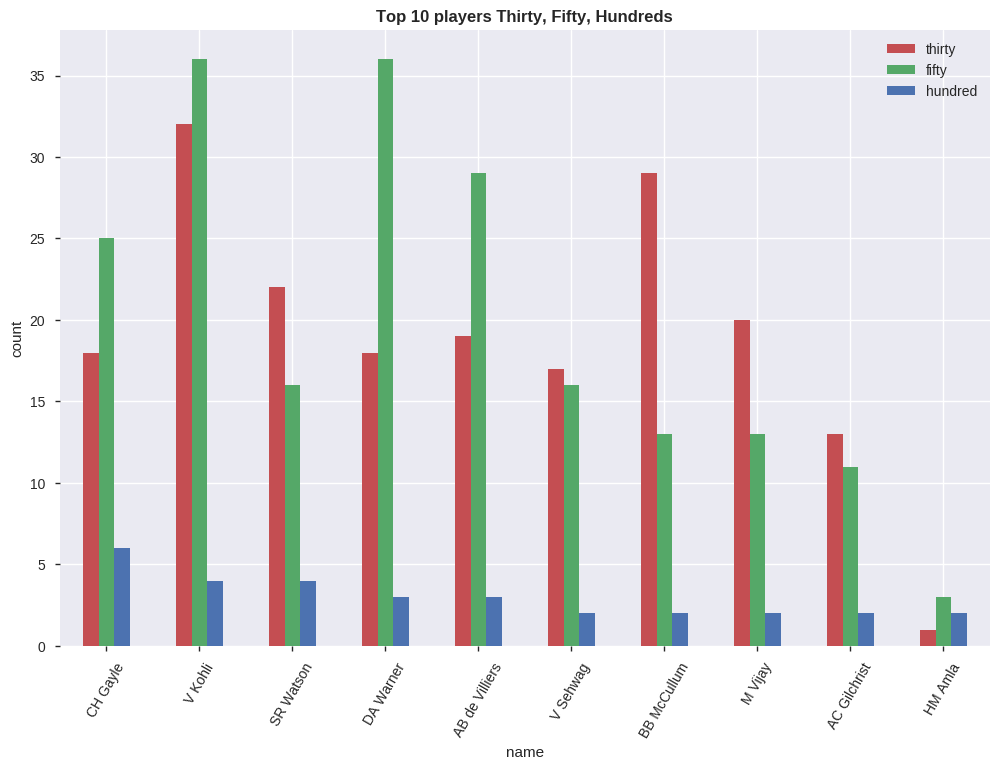

In [46]:
batsman.loc[:,['name','runs','thirty','fifty','hundred']].sort_values(['hundred','fifty','thirty'],ascending=False).head(10).plot.bar(x='name',y=['thirty','fifty','hundred'],figsize=(12,8),color=['r', 'g', 'b', 'k', 'y', 'm', 'c']).set_title('Top 10 players Thirty, Fifty, Hundreds',weight='bold')
plt.xticks(rotation=60)
plt.ylabel('count')


## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- The team who bat second __60%__ of the won the match.
- __Mumbai indian__ has won more matches then other teams.
- __CH Gayle__ has won highestnumber of time Player of the match.
- __SL Malinga__ is highest wicket taker in IPL	with __154 wickets in 110 innings__		
- __39.2 %__ matches has been high scoring(more then 180) in IPL
- Top scrore made thier 55% to 70% runs boundaries.
- Around __526__ players have been played in IPL league over the years. 